# Skewness 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
boston=load_boston()

In [3]:
#Boston Housing dataset 
X=boston['data']
Y=boston['target']
col=boston['feature_names']
df=pd.DataFrame(X,columns=col)
df['Price']=Y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
col

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

We will check for skewness in every feature of our housing dataset

In [5]:
m=list(df.columns)

In [6]:
m

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'Price']

In [7]:
skewness_dict={}
for i in m:
    n=df[i].skew()
    skewness_dict.update({i:n})

In [8]:
skewness_dict

{'CRIM': 5.223148798243851,
 'ZN': 2.2256663227354307,
 'INDUS': 0.29502156787351164,
 'CHAS': 3.405904172058746,
 'NOX': 0.7293079225348787,
 'RM': 0.40361213328874385,
 'AGE': -0.5989626398812962,
 'DIS': 1.0117805793009007,
 'RAD': 1.0048146482182057,
 'TAX': 0.669955941795016,
 'PTRATIO': -0.8023249268537809,
 'B': -2.8903737121414492,
 'LSTAT': 0.9064600935915367,
 'Price': 1.1080984082549072}

So above dict give us the information that in our housing dataset feature "CRIM","ZN" and "CHAS" are positively skewed. Feature "B" is negatively skewed.

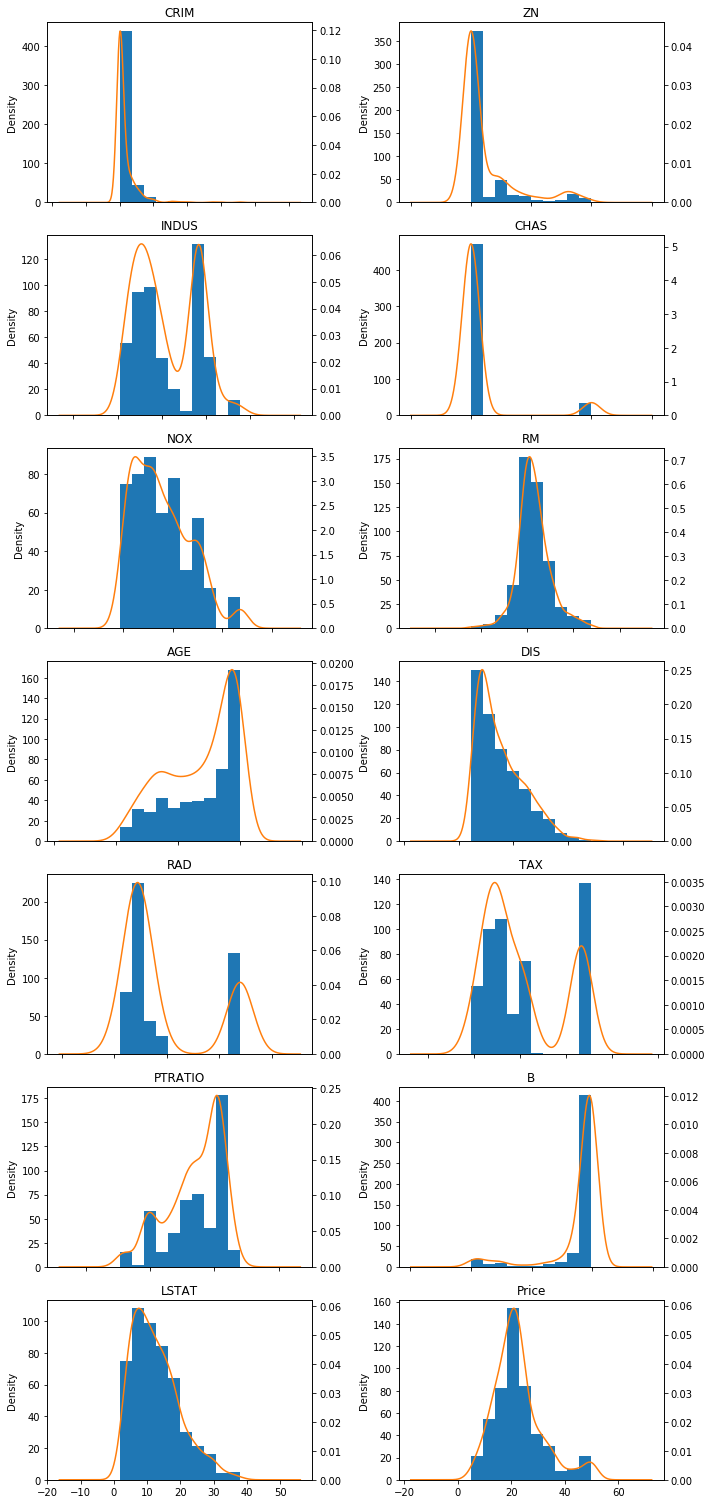

In [9]:
k = len(df.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

# 1. Log Transformation

Skewness before log transformation 5.223148798243851
**************************************************************************
Skewness after log transformation 0.4059344988496048
**************************************************************************


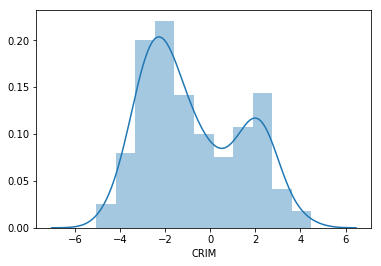

In [10]:
print("Skewness before log transformation "+str(df['CRIM'].skew()))
print("**************************************************************************")
crim_log=np.log(df['CRIM'])
print("Skewness after log transformation "+str(crim_log.skew()))
print("**************************************************************************")
#Plot after transformation
sns.distplot(crim_log)

So above transformation shows us the that skewness for feature CRIM has drastically gone down.

# 2. Sqaure root transform

Skewness before log transformation 5.223148798243851
**************************************************************************
Skewness after square root transformation 2.024382103123676
****************************************************************************


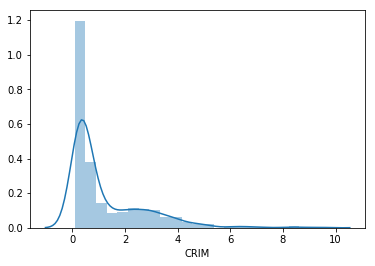

In [11]:
crim_sqrt=np.sqrt(df['CRIM'])
print("Skewness before log transformation "+str(df['CRIM'].skew()))
print("**************************************************************************")
print("Skewness after square root transformation "+str(crim_sqrt.skew()))
print("****************************************************************************")
sns.distplot(crim_sqrt)

Sqaure root transformation has not much impacted our feature values but still the skewness is lowered to a reasonable level

# 3.BoxCox Transformation

Skewness before log transformation 5.223148798243851
**************************************************************************
Skewness after square root transformation 0.09364916787825833
****************************************************************************


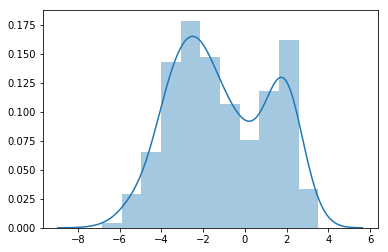

In [12]:
from scipy import stats
crim_boxcox=stats.boxcox(df['CRIM'])[0]
print("Skewness before log transformation "+str(df['CRIM'].skew()))
print("**************************************************************************")
print("Skewness after square root transformation "+str(pd.Series(crim_boxcox).skew()))
print("****************************************************************************")
sns.distplot(crim_boxcox)

# Normalization

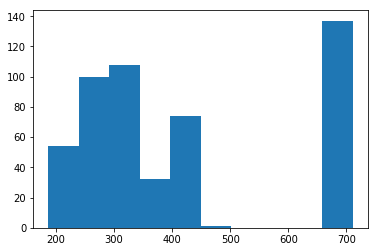

In [13]:
import matplotlib.pyplot as plt
plt.hist(df['TAX'])
plt.show()

So this feature of our dataframe has lot big numbers compare to our other features will normalize this feature now

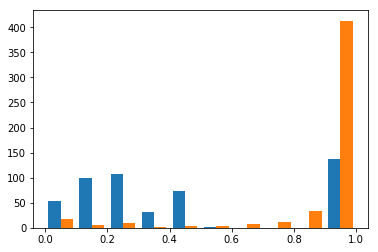

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
tax_normalize=scaling.fit_transform(df[['TAX','B']])
plt.hist(tax_normalize)
plt.show()

In [15]:
tax_normalize

array([[0.20801527, 1.        ],
       [0.10496183, 1.        ],
       [0.10496183, 0.98973725],
       ...,
       [0.16412214, 1.        ],
       [0.16412214, 0.99130062],
       [0.16412214, 1.        ]])

# Standardization(Z-score normalization)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaling=StandardScaler()

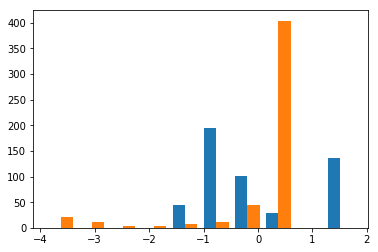

In [18]:
tax_standard=scaling.fit_transform(df[['TAX','B']])
plt.hist(tax_standard)
plt.show()

In [19]:
tax_standard

array([[-0.66660821,  0.44105193],
       [-0.98732948,  0.44105193],
       [-0.98732948,  0.39642699],
       ...,
       [-0.80321172,  0.44105193],
       [-0.80321172,  0.4032249 ],
       [-0.80321172,  0.44105193]])